In [1]:
from reservoir import ESN
from misc import *
import numpy as np
import time
import SYCLOP_env as syc
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def local_observer(sensor,agent):
    return np.concatenate([sensor.dvs_view[5,:].reshape([-1]),10*agent.qdot])
A = 3.0
A0 = 6.0
t_vec = np.array(list(range(1000)))
f_vec = 2*np.sin(t_vec/10.0)

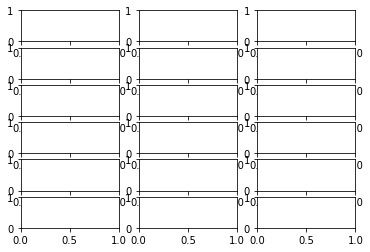

In [3]:
    hp=HP()
    hp.max_episode = 3000
    hp.steps_per_episode = 1000
    hp.steps_between_learnings = 1000

    vertical_edge_mat = np.zeros([28,28])
    vertical_edge_mat[:,14:] = 1.0
    recorder = Recorder(n=6)


    scene = syc.Scene(image_matrix=vertical_edge_mat)
    sensor = syc.Sensor()
    agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])
#     reward = syc.Rewards()
    esn = ESN(n_inputs = 18)

    hp.scene = scene.hp
    hp.sensor = sensor.hp
    hp.agent = agent.hp
    hp.reward = reward.hp


In [4]:
        observation = local_observer(sensor,agent)


In [14]:
training_on = True

In [15]:

for step in range(hp.steps_per_episode):
    esn.step(uin = observation.reshape([-1,1]))
    if training_on:
        esn.FORCE_step(f_vec[step])
    agent.q_ana[0] = A0+A*esn.z
    agent.act(2)
    sensor.update(scene,agent)
    reward.update_rewards(sensor = sensor, agent = agent)
    observation_  = local_observer(sensor,agent) #todo: generalize
    recorder.record([agent.q_ana[0],agent.q[0],agent.qdot[0],reward.rewards[0],reward.rewards[1],reward.reward])
    observation = observation_
    step += 1
    if step%1000 ==0:
        print(step)
#         recorder.plot()

1000


In [16]:
step

1000

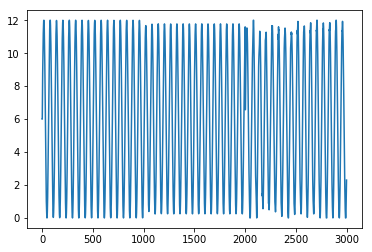

In [17]:

plt.plot(recorder.records[0])

In [9]:
training_on = False

In [21]:
    vertical_edge_mat = np.zeros([28,28])
    vertical_edge_mat[:,14:15] = 2.0
    vertical_edge_mat[:,10:11] = 1.0
    scene = syc.Scene(image_matrix=vertical_edge_mat)

In [22]:

for step in range(hp.steps_per_episode):
    esn.step(uin = observation.reshape([-1,1]))
    if training_on:
        esn.FORCE_step(f_vec[step])
    agent.q_ana[0] = A0+A*esn.z
    agent.act(2)
    sensor.update(scene,agent)
    reward.update_rewards(sensor = sensor, agent = agent)
    observation_  = local_observer(sensor,agent) #todo: generalize
    recorder.record([agent.q_ana[0],agent.q[0],agent.qdot[0],reward.rewards[0],reward.rewards[1],reward.reward])
    observation = observation_
    step += 1
    if step%1000 ==0:
        print(step)

1000


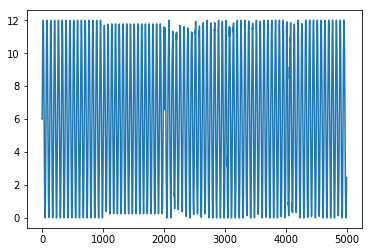

In [23]:
plt.plot(recorder.records[0])

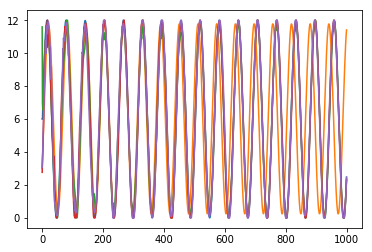

In [24]:
for chunk in range(8):
    plt.plot(recorder.records[0][chunk*1000:(chunk+1)*1000])